## Exercise for KYBS3050

### Mika Lammi 2022

## Description of data and goal of this exercise

### What data am I using

The data I am using in this exercise is Spambase Data Set from UCI Machine learning repository [(source of the dataset)](https://archive.ics.uci.edu/ml/datasets/Spambase).

It is a collection of email data separated into two categories: spam and non-spam e-mails. The source of spam e-mails come from their postmaster and individuals who had filed those emails as spam. Collection of non-spam e-mails come from filed work and personal e-mails.

The data is useful for constructing personalized spam filters and it isn't really suitable for generating all purpose spam filters for general public. However, I think that his dataset is suitable for my current exercise.

### How am I going to do with the data

I am going to use the data to train a machine learning algorithm to detect which emails the user might consider as spam e-mails and which emails the user might consider as non-spam e-mails.



In [117]:
import numpy as np
import scipy as sp
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [118]:
# Download the data for usage
def getDataset():
    url = "https://www.dropbox.com/s/vwiyk1qeq87xuku/spambase.data.csv?dl=1"
    dataset = np.array(pd.read_csv(url))
    headers = pd.read_csv(url, index_col=0, nrows=0).columns.tolist()
    cols = dataset.shape[1]
    rows = dataset.shape[0]
    classifications = dataset[:, cols-1].tolist()
    data = dataset[:,0:cols-1]
    feature_names = headers[0:cols-2]
    return data, classifications, feature_names

# classification: 1 = spam, 0 = non-spam
X, y, feature_names = getDataset()

print("Data shape: ", X.shape)
print("Feature names: ", feature_names)

Data shape:  (4601, 57)
Feature names:  ['word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 

In [124]:
# Standardize data for PCA
from sklearn.preprocessing import StandardScaler

# initialize StandardScaler
sc = StandardScaler()

# let it figure out means and standard deviations for each 
# feature and use them to standardize the data
sc.fit(X)
X_std = sc.transform(X)




# PCA
from sklearn.decomposition import PCA

# Ideally, you would choose the number of components to include in your model by adding the explained variance ratio 
# of each component until you reach a total of around 0.8 or 80% to avoid overfitting.

n_components = 35
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

print("Variance of each component:", pca.explained_variance_ratio_)
print("Singular values:", pca.singular_values_)
print('\n Total Variance Explained with', n_components, 'components:', round(sum(list(pca.explained_variance_ratio_))*100, 2), '%')



Variance of each component: [0.11564794 0.05732324 0.03514299 0.02830071 0.02712438 0.02565587
 0.02480269 0.02412097 0.0227165  0.02240128 0.02134598 0.01981364
 0.01945842 0.0192053  0.01906751 0.01865053 0.01837801 0.01794944
 0.01775431 0.01757664 0.01742616 0.01714442 0.01688785 0.01649614
 0.01641586 0.01620605 0.01603566 0.01583679 0.01529218 0.01515976
 0.01465147 0.01449434 0.01394437 0.01363074 0.01355759]
Singular values: [174.1536141  122.61085476  96.0025753   86.15137988  84.34190851
  82.02701527  80.65158866  79.53549083  77.18523514  76.64783894
  74.8206773   72.08513578  71.43602886  70.96989126  70.71482631
  69.93734546  69.4244964   68.61024191  68.23629218  67.89402019
  67.60274923  67.05403163  66.55041649  65.77405946  65.6138343
  65.19317929  64.84955867  64.44617706  63.32836844  63.05357479
  61.98749465  61.65421806  60.47321595  59.78927494  59.62863198]

 Total Variance Explained with 35 components: 80.56 %


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100, shuffle=True)

print("Training data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)
print("Testing classification length: ", len(y_test))
print("Training classification length: ", len(y_train))

Training data shape:  (3082, 57)
Test data shape:  (1519, 57)
Testing classification length:  1519
Training classification length:  3082


5
6


<Figure size 3000x3000 with 0 Axes>

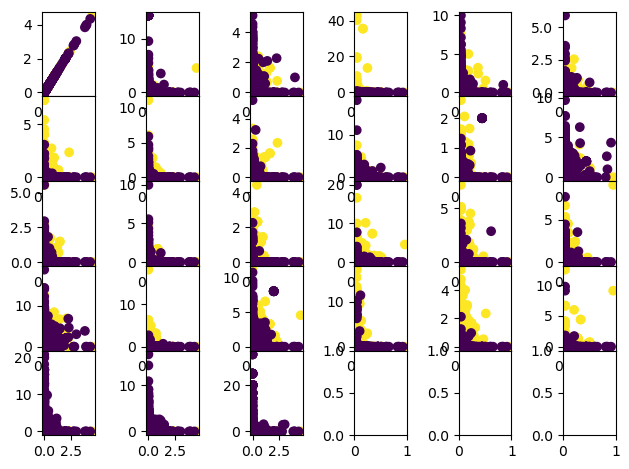

In [131]:
# Visualizing PCA data

import math

def plots(num):
    num = num
    temp = math.sqrt(num)

    half = num//2
    subplotsX = math.floor(temp)
    subplotsY = math.ceil(temp)
    print(subplotsX)
    print(subplotsY)
    plt.figure(figsize=(30,30))
    fig, ax = plt.subplots(subplotsX, subplotsY)

    for i in range(0, num):
        plt.subplot(subplotsX, subplotsY, i+1)
        # plt.title(i)
        plt.scatter(X[:, 0], X[:, i], c=y)
        # plt.xlabel('pc 0')
        # plt.ylabel('pc ' + str(i))

    
    plt.tight_layout()
    plt.show()


plots(27)